In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [192]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [116]:
""" Задание 9.1 """
fig = px.pie(
    data_frame=churn_data,
    names= 'Exited',
    height=300,
    width=700,
    title='Соотношение ушедших и лояльных клиентов',
)
fig.show()
# Как мы видим на графике - количество лояльных клиентов больше, чем количество ушедших клиентов.

In [117]:
""" Задание 9.2 """
histogram_data = churn_data[churn_data['Balance']>2500]
fig = px.histogram(
    data_frame = histogram_data,
    x = 'Balance',
    height=300,
    width=700,
    title='Распределение баланса на счетах в банке (>2500$)',
)
fig.show()
# Из графика мы видим что большинство клиентов хранит в банке от 100 до 150 тысяч долларов.

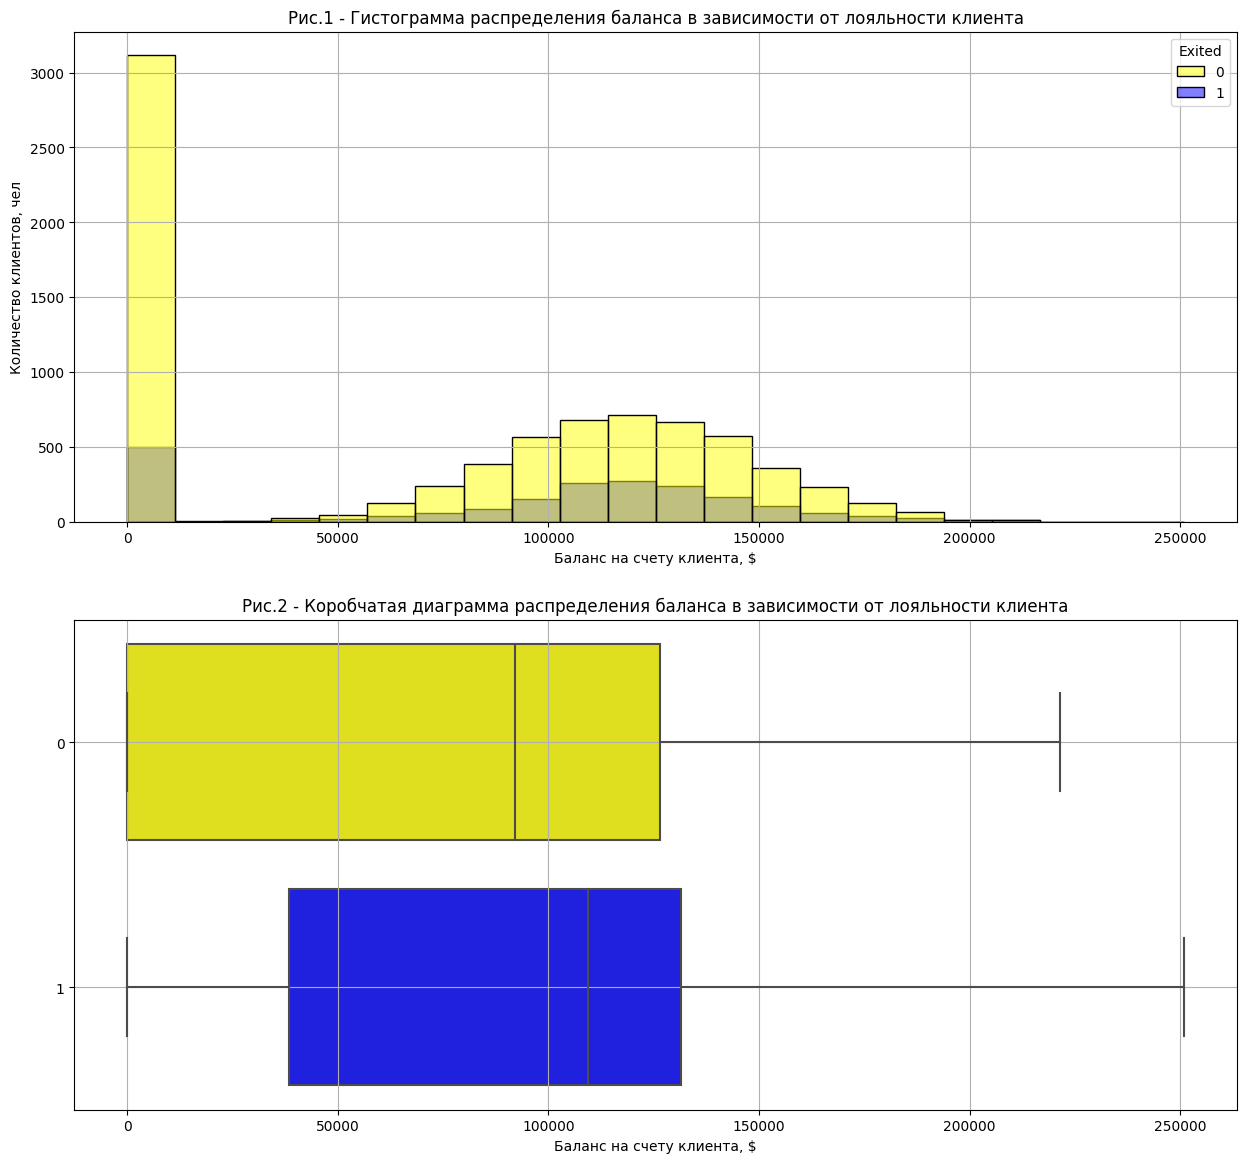

In [122]:
""" Задание 9.3 """
# задаем кол-во графиков и размер
fig_3, axes_3 = plt.subplots(nrows=2, ncols=1, figsize=(15, 14)) 
# определяем первый график, гистограмму распределения
histplot=sns.histplot(
    data=churn_data, 
    x='Balance', 
    hue='Exited',
    ax=axes_3[0],
    palette=['yellow', 'blue']
)
histplot.set_title('Рис.1 - Гистограмма распределения баланса в зависимости от лояльности клиента')
histplot.set_ylabel('Количество клиентов, чел')
histplot.set_xlabel('Баланс на счету клиента, $')
histplot.grid()
# определяем второй график, boxplot
boxplot=sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Balance',
    orient='h',
    ax=axes_3[1],
    palette=['yellow', 'blue']
)
boxplot.set_title('Рис.2 - Коробчатая диаграмма распределения баланса в зависимости от лояльности клиента')
boxplot.set_ylabel('')
boxplot.set_xlabel('Баланс на счету клиента, $')
boxplot.grid()
# Суммы на накопительных счетах лояльных клиентов больше чем нелояльных
# У многих лояльных клиентов этого банка нулевой баланс
# С чем может быть связан исход клиентов из банка - не ясно, по данным этой базы не удалось выяснить

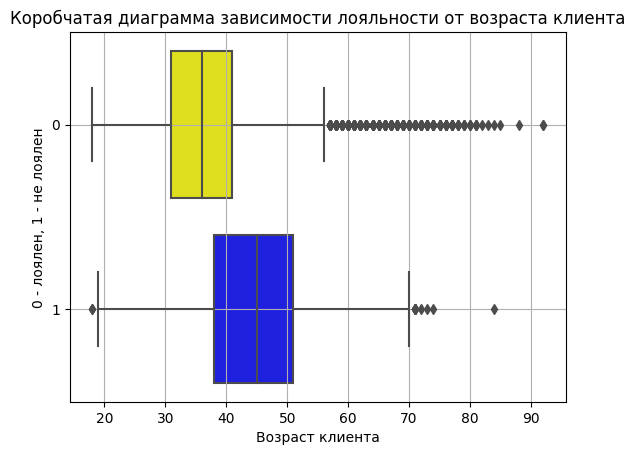

In [130]:
""" Задание 9.4 """
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Age',
    orient='h',
    palette=['yellow', 'blue']
    )
boxplot.set_title('Коробчатая диаграмма зависимости лояльности от возраста клиента')
boxplot.set_ylabel('0 - лоялен, 1 - не лоялен')
boxplot.set_xlabel('Возраст клиента')
boxplot.grid()
# Группа клиентов от 40 до 50 лет чаще всего уходят из банка, на них стоит обратить особое внимание.

<Figure size 1000x700 with 0 Axes>

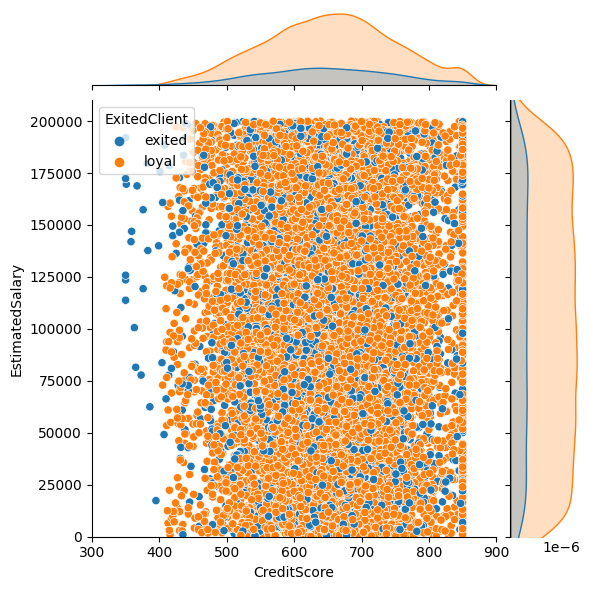

In [134]:
churn_data['ExitedClient'] = churn_data['Exited'].apply(lambda x: 'loyal' if x==0 else 'exited') #новый столбец с обозначением ушедшего/лояльного клиента для подписей на графиках

fig = plt.figure(figsize=(10, 7))
jointplot = sns.jointplot(
    data=churn_data,
    x='CreditScore', 
    y='EstimatedSalary',
    xlim = (300, 900),
    ylim = (0, 210000),
    hue='ExitedClient'
);
# Из данного графика мы можем видить, что у ушедших клиентов в среднем были низкие кредитные рейтинги и предполагаемые З/П

In [140]:
""" Задание 9.6 """
bar_data=churn_data.groupby(['Gender'], as_index=False)['Exited'].sum()
fig = px.bar(
    bar_data,
    x='Gender',
    y='Exited',
    height=500,
    width=1000,
    title="График ухода клиентов из банка"
)
fig.show()
# Cудя по данному графику мы видим что из банка чаще уходят женщины

In [145]:
""" Задание 9.7 """
bar_data = churn_data.groupby(['NumOfProducts', 'Exited'], as_index=False).count()
fig = px.bar(
    data_frame=bar_data,
    x='NumOfProducts',
    y='RowNumber',
    color='Exited',
    barmode='group',
    height=400,
    width=1000,
    title='Соотношение ушедших и лояльных клиентов в зависимости от числа услуг'
)
fig.show()
# На графике видно, что большинство у кого подключено больше 2х услуг банка ушли.
# Напротив, у кого подключено менее трёх услуг остаются лояльными к банку.

In [146]:
""" Задание 9.8 """
bar_data=churn_data.groupby(['IsActiveMember'], as_index=False)['Exited'].sum()
fig = px.bar(
    bar_data,
    x='IsActiveMember',
    y='Exited',
    height=500,
    width=1000,
    color="IsActiveMember",
    title="Влияние статуса активного пользователя на отток клиентов."
)
fig.show()
# На этом графике мы видим, что не активные пользователи банка чаще уходят.

In [167]:
""" Задание 9.9 """
bar_data=churn_data.groupby(['Geography'], as_index=False)['Exited'].mean()
fig = px.bar(
    bar_data,
    x='Geography',
    y='Exited',
    height=500,
    width=1000,
    color="Exited",
    title="Влияние статуса активного пользователя на отток клиентов."
)
fig.show()
bar_data=churn_data.groupby(['Geography'], as_index=False)['Exited'].mean()
fig = px.choropleth(
    data_frame=churn_data, #DataFrame
    locations="Geography", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="Exited", #от чего зависит цвет
    range_color=[0, 0.5], #диапазон цвета
    title='Доля ушедших клиентов', #заголовок
    width=1600, #ширина
    height=1000, #высота
    color_continuous_scale='Reds' #палитра цветов
)
fig.show()
# Как видно на графике доля ушедших клиентов больше всего в Германии, с чем это связано - только им известно 

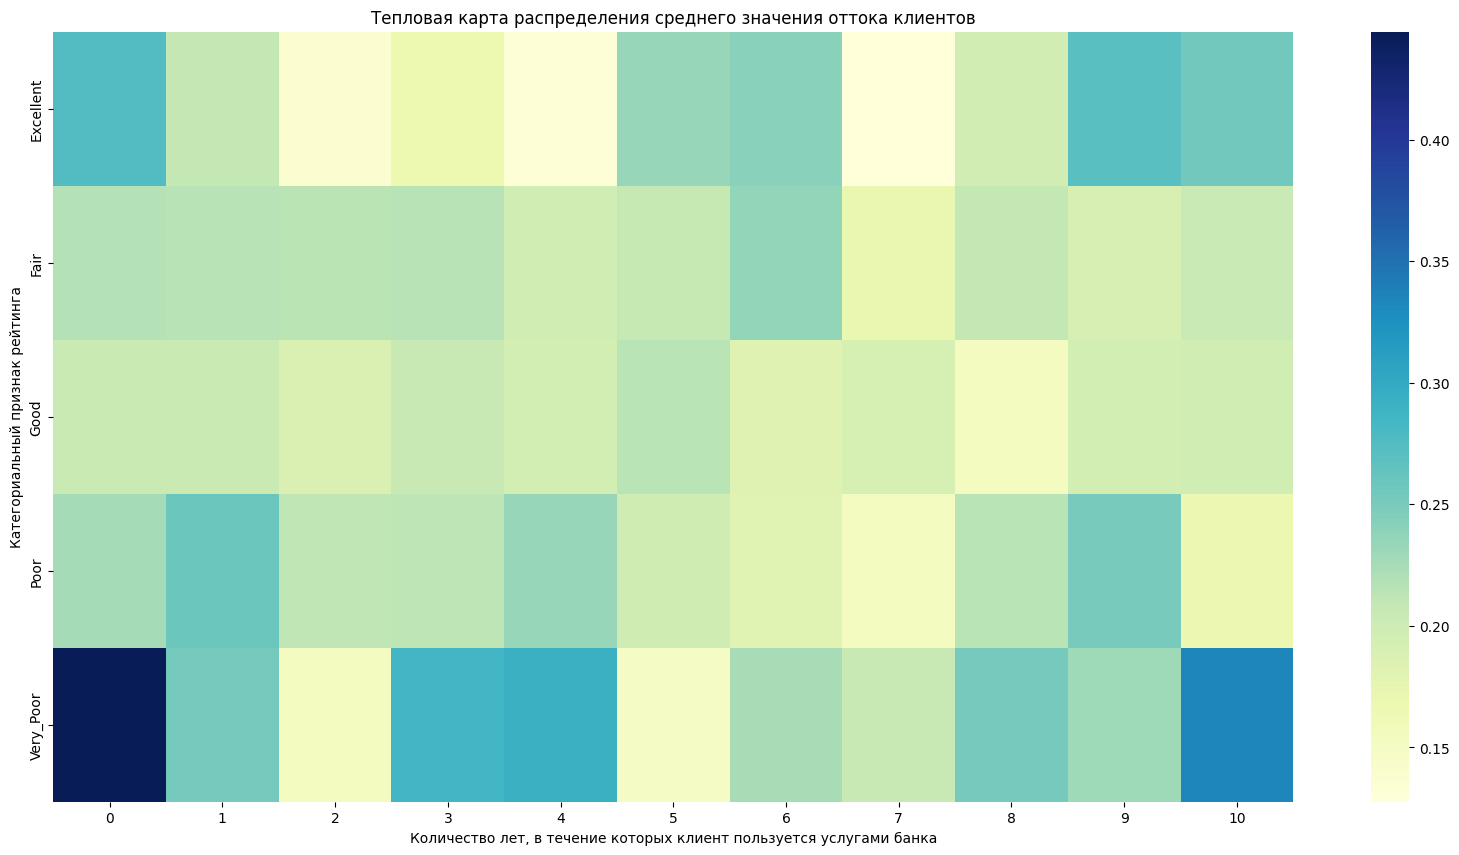

In [202]:
""" Задание 9.10 """
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
pivot = churn_data.pivot_table(
    'Exited',
    columns='Tenure',
    index='CreditScoreCat',
    aggfunc='mean'
)
fig_9, axes_9 = plt.subplots(figsize=(20, 10))
heatmap = sns.heatmap(data=pivot, ax=axes_9, cmap='YlGnBu')
heatmap.set_title('Тепловая карта распределения среднего значения оттока клиентов');
heatmap.set_ylabel('Категориальный признак рейтинга')
heatmap.set_xlabel('Количество лет, в течение которых клиент пользуется услугами банка');
# На основе таблицы делаем вывод что чаще всего уходят клиенты находящиеся в банке менее 1 года и с очень низким кредитным рейтингом.